<a href="https://colab.research.google.com/github/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 9**

Morfologi (Erosi, Dilasi, Opening, Closing,
Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)


---

Nama : Ratnasari

Kelas : TI 3D

NIM : 2241720007

Absen :25


---
Link Modul : https://drive.google.com/file/d/15K69EVqRB4NzcWeYE2qVD8UdxreeBIFb/view

Link Github :

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

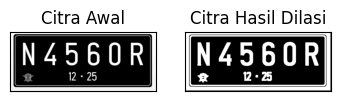

In [12]:
# Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range (constant1, p-constant1):
    for j in range (constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

img_d = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


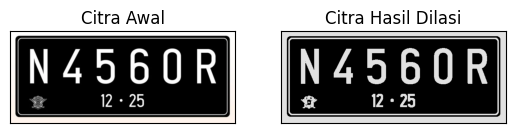

In [13]:
img = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

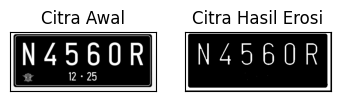

In [14]:
#Erosi Tanpa Library

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Dilasi
  for i in range (constant, m-constant):
    for j in range (constant, n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

img_e = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

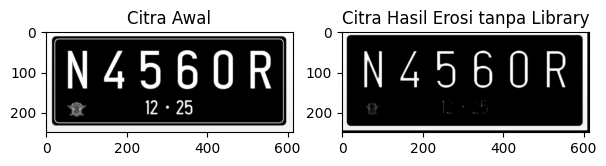

In [15]:
# Erosi tanpa library

# Input image
input_image = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk square 5x5
sq = np.ones((5,5))

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    erode_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for i in range(0,rows-(kernel.shape[0]-1)):
        for j in range(0,cols-(kernel.shape[0]-1)):
            erode_img[i,j]=np.min(sq * newimg[i:i+kernel.shape[0],j:j+kernel.shape[0]])
    return erode_img

# Citra hasil erosi
output_image = morph_erode(input_image, sq)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi tanpa Library")
axs[1].imshow(output_image, cmap='gray')

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

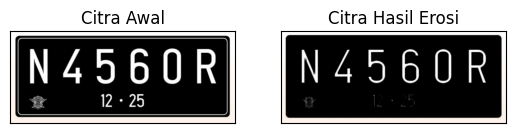

In [16]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG')

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

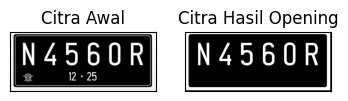

In [20]:
def opening(image, kernel):

    # Operasi Erosi
    eroded_image = erosi(image, kernel)

    # Operasi Dilasi
    opened_image = dilasi(eroded_image, kernel)

    return opened_image

img_o = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0) #

reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho, k), k)

plt.subplot(131), plt.imshow(img_o, cmap= 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray'), plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])
plt.show()

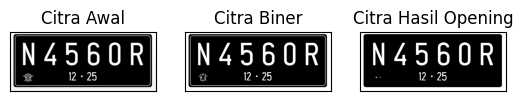

In [21]:

#Dengan menggunakan library
img = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray'), plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap = 'gray'), plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])
plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

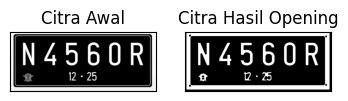

In [23]:
img_c = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0) #

retc, threshc = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc, k), k)

plt.subplot(131), plt.imshow(img_c, cmap= 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgC, cmap='gray'), plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])
plt.show()

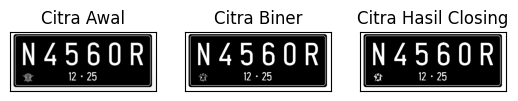

In [24]:
img = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray'), plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(close, cmap = 'gray'), plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Cross 3


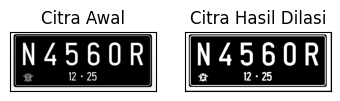

SED = Cross 5


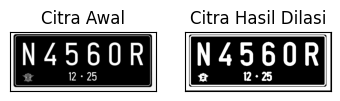

In [26]:
# Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi (SED)
  #SED= np.ones((w,w), dtype=np.uint8)
  SED= np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range (constant1, p-constant1):
    for j in range (constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 127, 2252, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi (SED)
  #SED= np.ones((w,w), dtype=np.uint8)
  SED= np.array([[0,0,1,0,0],
                 [0,0,1,0,0],
                 [1,1,1,1,1],
                 [0,0,1,0,0],
                 [0,0,1,0,0]], dtype= np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range (constant1, p-constant1):
    for j in range (constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Circle 3


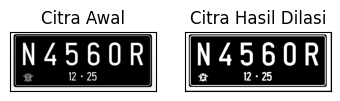

SED = Circle 5


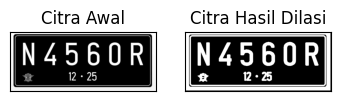

In [27]:
# Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range (constant1, p-constant1):
    for j in range (constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img_d = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 127, 2252, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d = cv2.imread('/content/drive/MyDrive/ratna/images/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: